In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "Linkedin_data.xlsx"

df = pd.ExcelFile(file)

sheet_names = df.sheet_names
sheet_names

['DISCOVERY',
 'ENGAGEMENT',
 'TOP POSTS',
 'FOLLOWERS',
 'DEMOGRAPHICS',
 'TOP FOLLOWERS']

In [2]:
# Load the "Discovery" sheet
df_disc = pd.read_excel(df, sheet_name="DISCOVERY")
df_disc

,Overall Performance,7/31/2024 - 3/30/2025
0,Impressions,10839
1,Members reached,1493


In [30]:
# Given values
impressions = 10839
members_reached = 1493

# Calculate average impressions per member
avg_impressions_per_member = impressions / members_reached

print(f"Average impressions per member: {avg_impressions_per_member:.2f}")

Average impressions per member: 7.26


In [4]:
# Load the "Engagement" sheet
df_eng = pd.read_excel(df, sheet_name="ENGAGEMENT")

# Preview the first few rows
df_eng.head(10)

,Date,Impressions,Engagements
0,7/31/2024,0,0
1,8/1/2024,0,0
2,8/2/2024,0,0
3,8/3/2024,0,0
4,8/4/2024,0,0
5,8/5/2024,86,0
6,8/6/2024,131,2
7,8/7/2024,45,1
8,8/8/2024,84,0
9,8/9/2024,35,2


In [5]:
# Ensure Date is in datetime format
df_eng["Date"] = pd.to_datetime(df_eng["Date"])

# Group by month and sum only numeric columns
df_monthly = df_eng.groupby(df_eng["Date"].dt.to_period("M")).sum(numeric_only=True)

# Convert Period index to string for plotting
df_monthly.index = df_monthly.index.astype(str)

df_monthly

,Impressions,Engagements
Date,,
2024-07,0,0
2024-08,835,19
2024-09,1264,67
2024-10,1602,24
2024-11,440,1
2024-12,1955,44
2025-01,708,9
2025-02,1888,34
2025-03,2147,63


In [6]:
total_imp = df_eng["Impressions"].sum()
total_eng = df_eng["Engagements"].sum()
total_imp, total_eng

(np.int64(10839), np.int64(261))

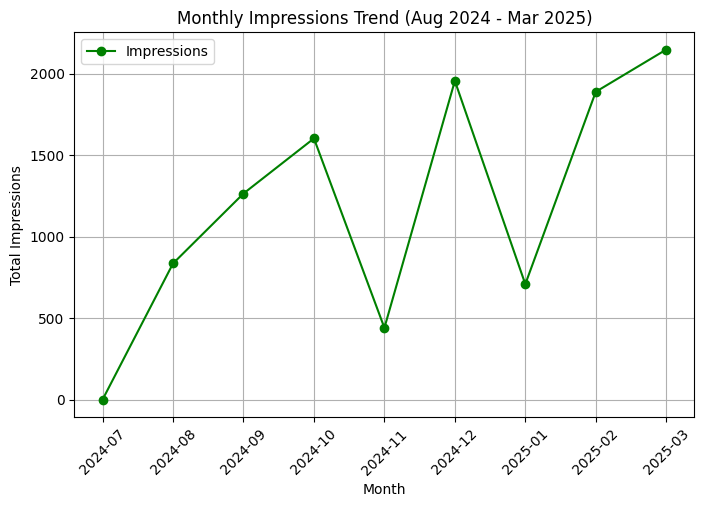

In [7]:
# Plot impressions trend
plt.figure(figsize=(8, 5))
plt.plot(df_monthly.index, df_monthly["Impressions"], marker="o", linestyle="-", color="g", label="Impressions")
plt.xlabel("Month")
plt.ylabel("Total Impressions")
plt.title("Monthly Impressions Trend (Aug 2024 - Mar 2025)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

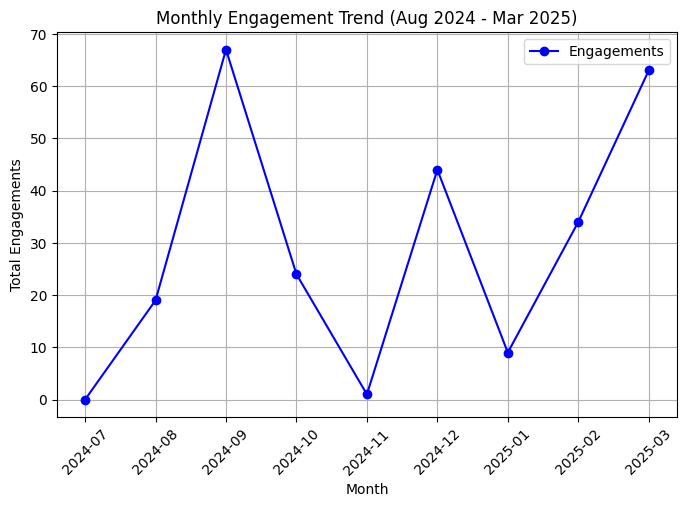

In [8]:
# Plot engagement trend again for comparison
plt.figure(figsize=(8, 5))
plt.plot(df_monthly.index, df_monthly["Engagements"], marker="o", linestyle="-", color="b", label="Engagements")
plt.xlabel("Month")
plt.ylabel("Total Engagements")
plt.title("Monthly Engagement Trend (Aug 2024 - Mar 2025)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

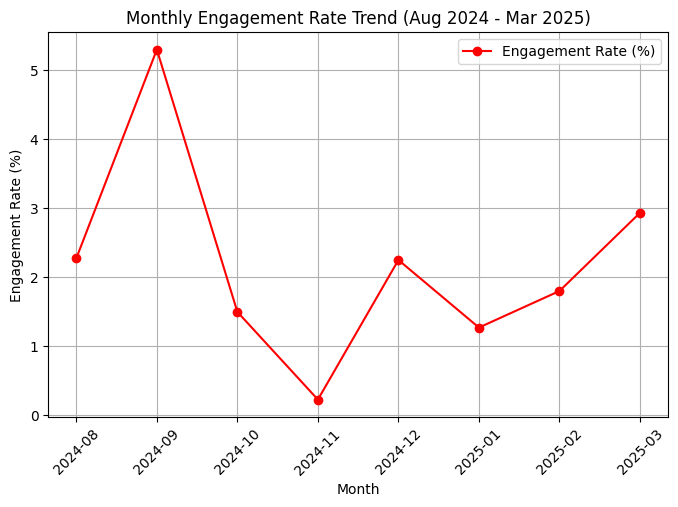

,Engagements,Impressions,Engagement Rate (%)
Date,,,
2024-07,0,0,NaN
2024-08,19,835,2.275449
2024-09,67,1264,5.300633
2024-10,24,1602,1.498127
2024-11,1,440,0.227273
2024-12,44,1955,2.250639
2025-01,9,708,1.271186
2025-02,34,1888,1.800847
2025-03,63,2147,2.934327


In [9]:
# Calculate Engagement Rate (Engagements / Impressions) per month
df_monthly["Engagement Rate (%)"] = (df_monthly["Engagements"] / df_monthly["Impressions"]) * 100

# Plot Engagement Rate Trend
plt.figure(figsize=(8, 5))
plt.plot(df_monthly.index, df_monthly["Engagement Rate (%)"], marker="o", linestyle="-", color="r", label="Engagement Rate (%)")
plt.xlabel("Month")
plt.ylabel("Engagement Rate (%)")
plt.title("Monthly Engagement Rate Trend (Aug 2024 - Mar 2025)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Display the engagement rate data
df_monthly[["Engagements", "Impressions", "Engagement Rate (%)"]]

In [10]:
# Calculate the average engagement rate
average_engagement_rate = df_monthly["Engagement Rate (%)"].mean()
average_engagement_rate

np.float64(2.1948102917052483)

In [14]:
# Load the "Top Posts" sheet
df_tp = pd.read_excel(df, sheet_name="TOP POSTS")

# Preview the first few rows
df_tp.head()

,Post URL,Post publish date,Engagements,Unnamed: 3,Post URL.1,Post publish date.1,Impressions
0,https://www.linkedin.com/feed/update/urn:li:ac...,12/27/2024,36,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,9/21/2024,639
1,https://www.linkedin.com/feed/update/urn:li:ac...,9/21/2024,32,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,3/13/2025,632
2,https://www.linkedin.com/feed/update/urn:li:ac...,3/17/2025,22,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,12/27/2024,555
3,https://www.linkedin.com/feed/update/urn:li:ac...,2/8/2025,22,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,10/21/2024,488
4,https://www.linkedin.com/feed/update/urn:li:ac...,3/14/2025,18,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,2/8/2025,484


In [15]:
# Rename columns for clarity
df_tp = df_tp.rename(columns={
    "Post URL": "Post URL",
    "Post publish date": "Post Date",
    "Engagements": "Engagements",
    "Post URL.1": "Post URL (Dup)",
    "Post publish date.1": "Post Date (Dup)",
    "Impressions": "Impressions"
})

# Drop duplicate Post URL and Date columns (keeping the first set)
df_tp = df_tp.drop(columns=["Post URL (Dup)", "Post Date (Dup)", "Unnamed: 3"])

# Convert 'Post Date' to datetime for sorting
df_tp["Post Date"] = pd.to_datetime(df_tp["Post Date"], errors="coerce")

# Sort by Post Date
df_tp = df_tp.sort_values(by="Post Date")

# Reset index after sorting
df_tp = df_tp.reset_index(drop=True)

# Display cleaned data
df_tp

,Post URL,Post Date,Engagements,Impressions
0,https://www.linkedin.com/feed/update/urn:li:ac...,2021-06-07,2,45
1,https://www.linkedin.com/feed/update/urn:li:ac...,2022-05-16,1,21
2,https://www.linkedin.com/feed/update/urn:li:ac...,2024-08-05,5,154
3,https://www.linkedin.com/feed/update/urn:li:ac...,2024-08-06,7,280
4,https://www.linkedin.com/feed/update/urn:li:ac...,2024-08-09,8,340
5,https://www.linkedin.com/feed/update/urn:li:ac...,2024-08-23,4,111
6,https://www.linkedin.com/feed/update/urn:li:ac...,2024-08-31,15,442
7,https://www.linkedin.com/feed/update/urn:li:ac...,2024-09-05,7,283
8,https://www.linkedin.com/feed/update/urn:li:ac...,2024-09-21,32,632
9,https://www.linkedin.com/feed/update/urn:li:ac...,2024-09-26,8,310


In [16]:
df_tp.shape

(21, 4)

In [17]:
# Convert 'Post Date' to datetime format for proper sorting
df_tp["Post Date"] = pd.to_datetime(df_tp["Post Date"])

# Sort data by Post Date
df_postdate = df_tp.sort_values("Post Date")

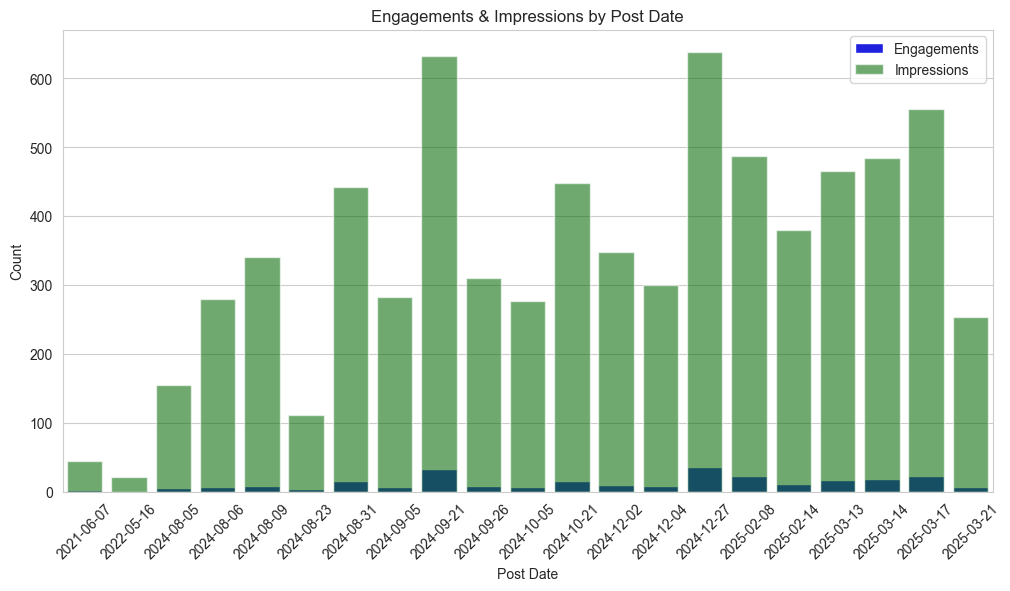

In [18]:
# Set plot style
sns.set_style("whitegrid")

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot bar chart for engagements and impressions
sns.barplot(data=df_postdate, x="Post Date", y="Engagements", color="blue", label="Engagements")
sns.barplot(data=df_postdate, x="Post Date", y="Impressions", color="green", alpha=0.6, label="Impressions")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Labels and title
plt.xlabel("Post Date")
plt.ylabel("Count")
plt.title("Engagements & Impressions by Post Date")
plt.legend()
plt.show()

### Why We Could Not Automate LinkedIn Post Caption Extraction
#### LinkedIn’s Privacy & Security Restrictions
 - LinkedIn does not provide public access to post captions via an API unless the user grants explicit developer access.

- Attempting to scrape post captions directly violates LinkedIn’s terms of service, which could lead to account restrictions or bans.

#### Exported Data Does Not Include Captions
 - The LinkedIn data export only includes Post URLs, Impressions, and Engagements, but not the actual text of the posts.

 - Without captions, automated analysis of post content (e.g., keyword extraction) is not possible.

#### Scraping Prevention by LinkedIn
 - LinkedIn has anti-bot protections that block automated data extraction from personal accounts.

 - Even if scraping were attempted, it would require complex browser automation and proxy rotation, which is risky.



### Alternative Approach: Analyzing Top Posts by Post Date
Since captions could not be extracted automatically, we decided to analyze and visualize post performance based on the date they were made.
This approach helps identify trends over time, such as:
 - Which days had the highest engagements
 - How impressions varied over time
 - Patterns in audience interaction

In [19]:
# Load the "Followers" sheet
df_followers = pd.read_excel(df, sheet_name="FOLLOWERS")
df_followers.head(10)

,Date,New followers
0,7/31/2024,0
1,8/1/2024,0
2,8/2/2024,2
3,8/3/2024,4
4,8/4/2024,0
5,8/5/2024,4
6,8/6/2024,1
7,8/7/2024,0
8,8/8/2024,1
9,8/9/2024,0


In [20]:
df_followers["Date"] = pd.to_datetime(df_followers["Date"])

# Group by month and sum only the 'New followers' column
df_followers_monthly = df_followers.groupby(df_followers["Date"].dt.to_period("M"))["New followers"].sum()

# Convert Period index to string for plotting
df_followers_monthly.index = df_followers_monthly.index.astype(str)

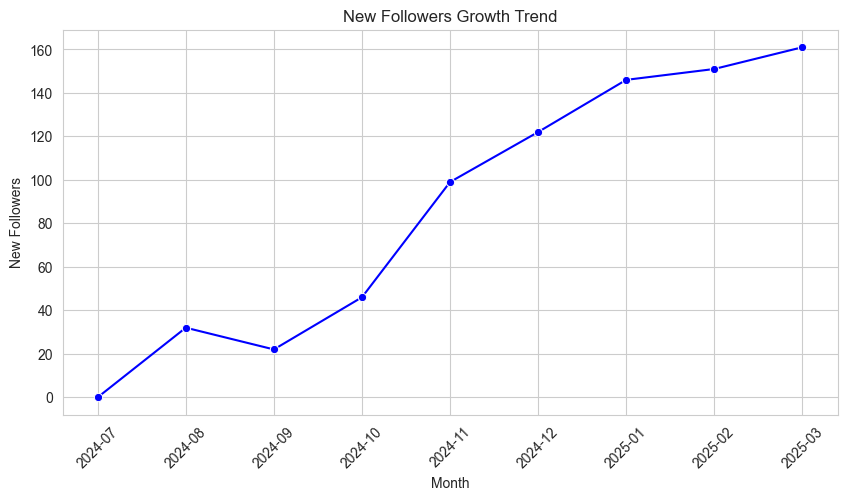

In [21]:
# Plot the new followers trend by month
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_followers_monthly.index, y=df_followers_monthly.values, marker="o", color="b")

# Labels and title
plt.xlabel("Month")
plt.ylabel("New Followers")
plt.title("New Followers Growth Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [22]:
# Convert 'Date' column to datetime format
df_followers["Date"] = pd.to_datetime(df_followers["Date"])

# Group by month and sum the 'New followers' column
df_followers_monthly = df_followers.groupby(df_followers["Date"].dt.to_period("M"))["New followers"].sum().reset_index()

# Convert period to string for better readability
df_followers_monthly["Date"] = df_followers_monthly["Date"].astype(str)

# Rename columns for clarity
df_followers_monthly.columns = ["Month", "Total New Followers"]

# Display the DataFrame
print(df_followers_monthly)

     Month  Total New Followers
0  2024-07                    0
1  2024-08                   32
2  2024-09                   22
3  2024-10                   46
4  2024-11                   99
5  2024-12                  122
6  2025-01                  146
7  2025-02                  151
8  2025-03                  161


In [23]:
# Calculate Total followers within the time frame
total_followers = df_followers["New followers"].sum()
print("Total new followers from July 31, 2024, to March 18, 2025:", total_followers)

Total new followers from July 31, 2024, to March 18, 2025: 779


In [24]:
# Load the "Demographics" sheet
df_demo = pd.read_excel(df, sheet_name="DEMOGRAPHICS")
df_demo

,Top Demographics,Value,Percentage
0,Job titles,Data Analyst,0.102609
1,Job titles,Data Scientist,0.083478
2,Job titles,Founder,0.026087
3,Job titles,Software Engineer,0.022609
4,Job titles,Data Science Specialist,0.012174
5,Locations,Lagos,0.09913
6,Locations,Greater Seattle Area,0.073043
7,Locations,Abuja,0.06087
8,Locations,"London Area, United Kingdom",0.026087
9,Locations,Ibadan,0.017391


In [25]:
# List the unique demographic categories
demo_cat = df_demo["Top Demographics"].unique()
demo_cat

array(['Job titles', 'Locations', 'Industries', 'Seniority',
       'Company size', 'Companies'], dtype=object)

In [26]:
# Filter the companies
companies = df_demo[df_demo["Top Demographics"] == "Companies"]

# Create a new dataframe with the company '10Alytics' and a new 'Other companies' category
new_companies = pd.DataFrame({
    "Top Demographics": ["Companies", "Companies"],
    "Value": ["10Alytics", "Other companies"],
    "Percentage": [companies.loc[companies["Value"] == "10Alytics", "Percentage"].values[0], 0.01]
})

# Drop the old companies and add the new ones to the dataframe
df_demo = df_demo[df_demo["Top Demographics"] != "Companies"]
df_demo = pd.concat([df_demo, new_companies], ignore_index=True)

In [27]:
# Convert the 'Percentage' column to float
df_demo["Percentage"] = df_demo["Percentage"].astype(float)
df_demo

,Top Demographics,Value,Percentage
0,Job titles,Data Analyst,0.102609
1,Job titles,Data Scientist,0.083478
2,Job titles,Founder,0.026087
3,Job titles,Software Engineer,0.022609
4,Job titles,Data Science Specialist,0.012174
5,Locations,Lagos,0.099130
6,Locations,Greater Seattle Area,0.073043
7,Locations,Abuja,0.060870
8,Locations,"London Area, United Kingdom",0.026087
9,Locations,Ibadan,0.017391


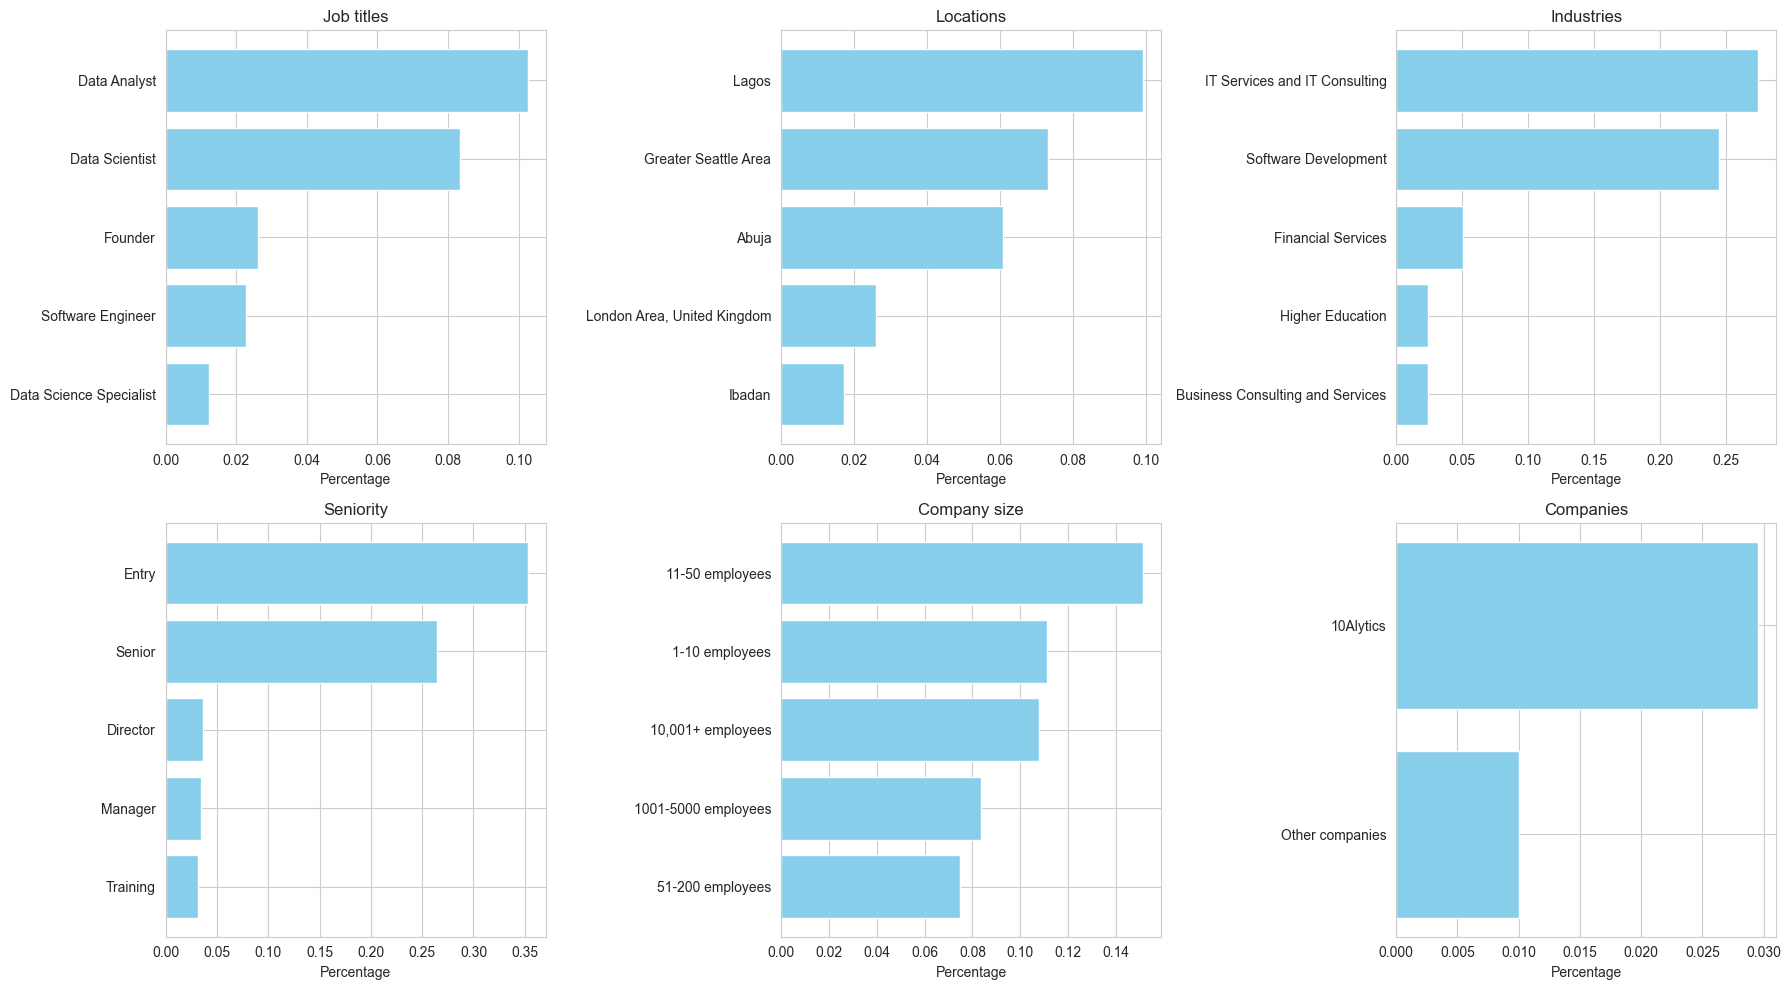

In [28]:
# Create a dictionary to store the top 5 values for each category
top_demo = {}

for category in demo_cat:
    subset = df_demo[df_demo["Top Demographics"] == category].nlargest(5, "Percentage")
    top_demo[category] = subset

# Plot bar charts for each category
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, category in enumerate(demo_cat):
    subset = top_demo[category]
    axes[i].barh(subset["Value"], subset["Percentage"], color="skyblue")
    axes[i].set_xlabel("Percentage")
    axes[i].set_title(category)
    axes[i].invert_yaxis()  # Highest values at the top

plt.tight_layout()
plt.show()

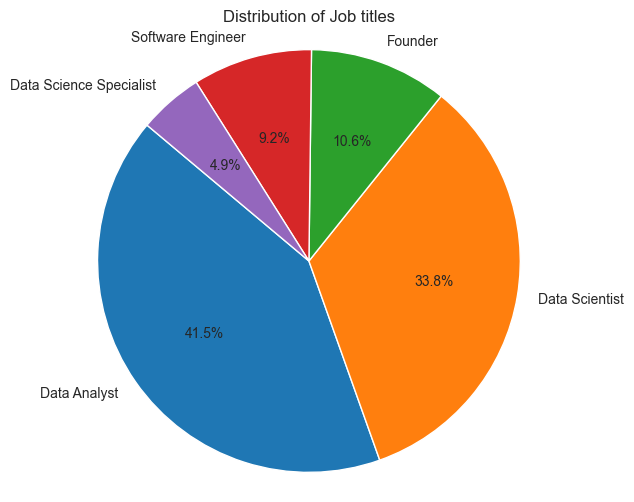

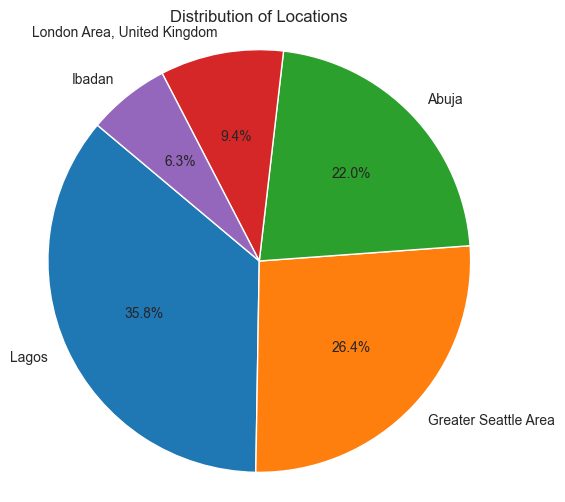

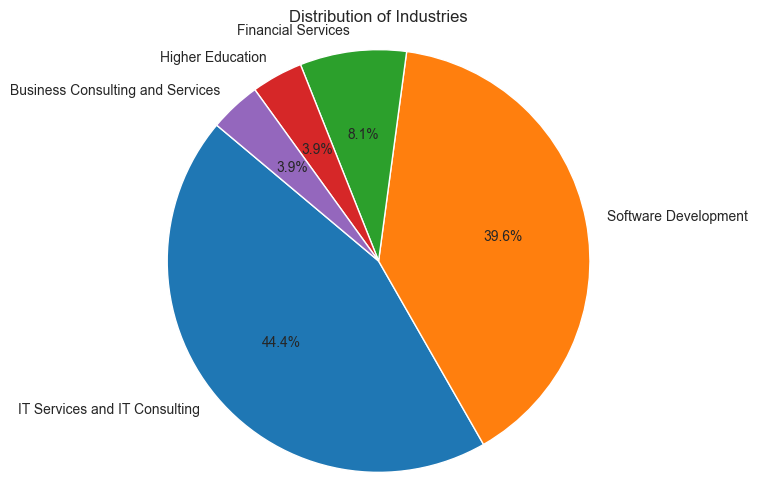

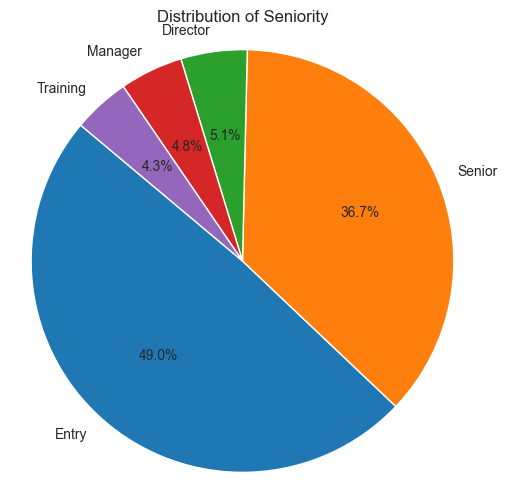

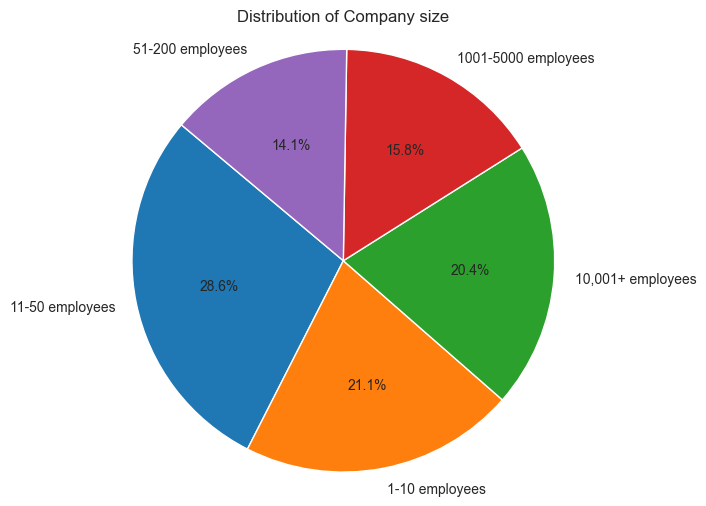

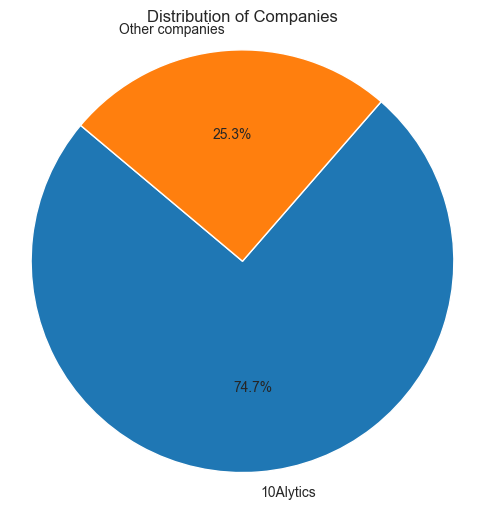

In [29]:
# Define a function to plot pie charts for demographics
def plot_pie_chart(data, title):
    plt.figure(figsize=(6, 6))
    plt.pie(data["Percentage"], labels=data["Value"], autopct="%1.1f%%", startangle=140)
    plt.title(title)
    plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie charts for each demographic category
for category in df_demo["Top Demographics"].unique():
    subset = df_demo[df_demo["Top Demographics"] == category]
    plot_pie_chart(subset, f"Distribution of {category}")